## Libraries Import 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
color = sns.color_palette()

## Data overview

In [2]:
ma = pd.read_csv('marketing_data.csv', encoding = 'ISO-8859-1')

ma.sample(10)

ï»¿ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
732    8650        1978  Graduation          Widow  $54,162.00         1   
611    8346        1974  Graduation         Single  $32,233.00         1   
1483   4437        1962  Graduation        Married  $65,316.00         1   
2016   8212        1971      Master        Married  $39,791.00         0   
1899   5939        1971  Graduation       Together  $38,232.00         1   
92    10914        1970  Graduation         Single  $24,163.00         1   
63     3112        1977      Master        Married  $22,701.00         1   
1153   5517        1969  Graduation        Married  $25,293.00         1   
970    1717        1988  Graduation         Single  $39,747.00         1   
2238    528        1978  Graduation        Married  $65,819.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
732          1     3/18/13       31         5  ...                  3   
611          0     8/19/12       26       138  ...                  2   
1483         1     4/24/13       65       112  ...                  5   
2016         1     3/28/13       89        85  ...                  4   
1899         1     1/17/14       84        43  ...                  3   
92           1    10/12/13        3         4  ...                  3   
63           0      9/5/13        2         2  ...                  3   
1153         0     9/15/13       51        15  ...                  2   
970          0     4/13/14       43        80  ...                  4   
2238         0    11/29/12       99       267  ...                 10   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
732                   4             0             0             0   
611                   9             1             0             0   
1483                  4             0             0             0   
2016                  7             0             0             0   
1899                  5             0             0             0   
92                    4             0             0             0   
63                    5             0             0             0   
1153                  8             0             0             0   
970                   8             0             0             0   
2238                  3             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
732              0             0         0         0       SP  
611              0             0         1         0       SP  
1483             0             0         0         0       SP  
2016             0             0         0         0       SP  
1899             0             0         0         0       SP  
92               0             0         0         0       SP  
63               0             0         0         0       SP  
1153             0             0         0         0      AUS  
970              0             0         0         0       SA  
2238             0             0         0         0      IND  

[10 rows x 28 columns]

In [3]:
ma.shape

(2240, 28)

In [4]:
ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ï»¿ID                2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [11]:
# clean column names that contain whitespace
ma.columns = ma.columns.str.replace(' ', '')

# transform Income column to a numerical
ma['Income'] = ma['Income'].str.replace('$', '')
ma['Income'] = ma['Income'].str.replace(',', '').astype('float')

C:\Users\Pc\AppData\Local\Temp\ipykernel_2836\3773993213.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ma['Income'] = ma['Income'].str.replace('$', '')


In [13]:
#rename column ID 
ma.rename(columns={'ï»¿ID':'ID'}, inplace=True)

In [15]:
# transform dt customer to date
import datetime
ma['Dt_Customer'] = pd.to_datetime(ma['Dt_Customer'])


In [50]:
ma['Year_Customer'] = pd.DatetimeIndex(ma['Dt_Customer']).year

In [51]:
#our clean data 
ma.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2014-06-16        0       189  ...                  1             0   
1  2014-06-15        0       464  ...                  5             0   
2  2014-05-13        0       134  ...                  2             0   
3  2014-05-11        0        10  ...                  7             0   
4  2014-04-08        0         6  ...                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

   Country  Year_Customer  
0       SP           2014  
1       CA           2014  
2       US           2014  
3      AUS           2014  
4       SP           2014  

[5 rows x 29 columns]

In [21]:
#null values
ma.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [22]:
ma['Income'].unique()

array([84835., 57091., 67267., ..., 46310., 65819., 94871.])

In [23]:
ma['Income'].describe().round(2)

count      2216.00
mean      52247.25
std       25173.08
min        1730.00
25%       35303.00
50%       51381.50
75%       68522.00
max      666666.00
Name: Income, dtype: float64

In [29]:
#IQR=Q3-Q1
IQR=68522.00- 35303.00
IQR


33219.0

In [30]:
#min_out=Q1-1.5*IQR
min_out=35303.00-1.5*33219.0
min_out

-14525.5

In [31]:
#max_out=Q3+1.5*IQR
max_out=68522.00+1.5*33219.0
max_out

118350.5

<AxesSubplot: >

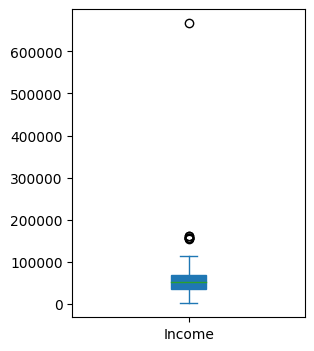

In [32]:

ma['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_2836\3998623114.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ma['Income'], kde=False, hist=True)


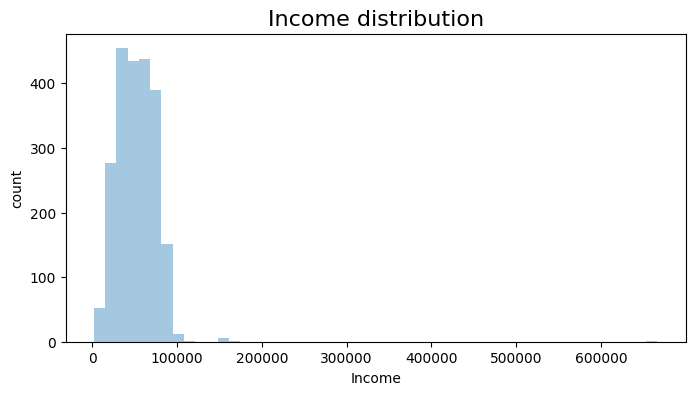

In [34]:
plt.figure(figsize=(8,4))
sns.distplot(ma['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

In [35]:
#Impute null values in Income, 
#using median value (to avoid skewing of the mean due to outliers):
ma['Income'] = ma['Income'].fillna(ma['Income'].median())

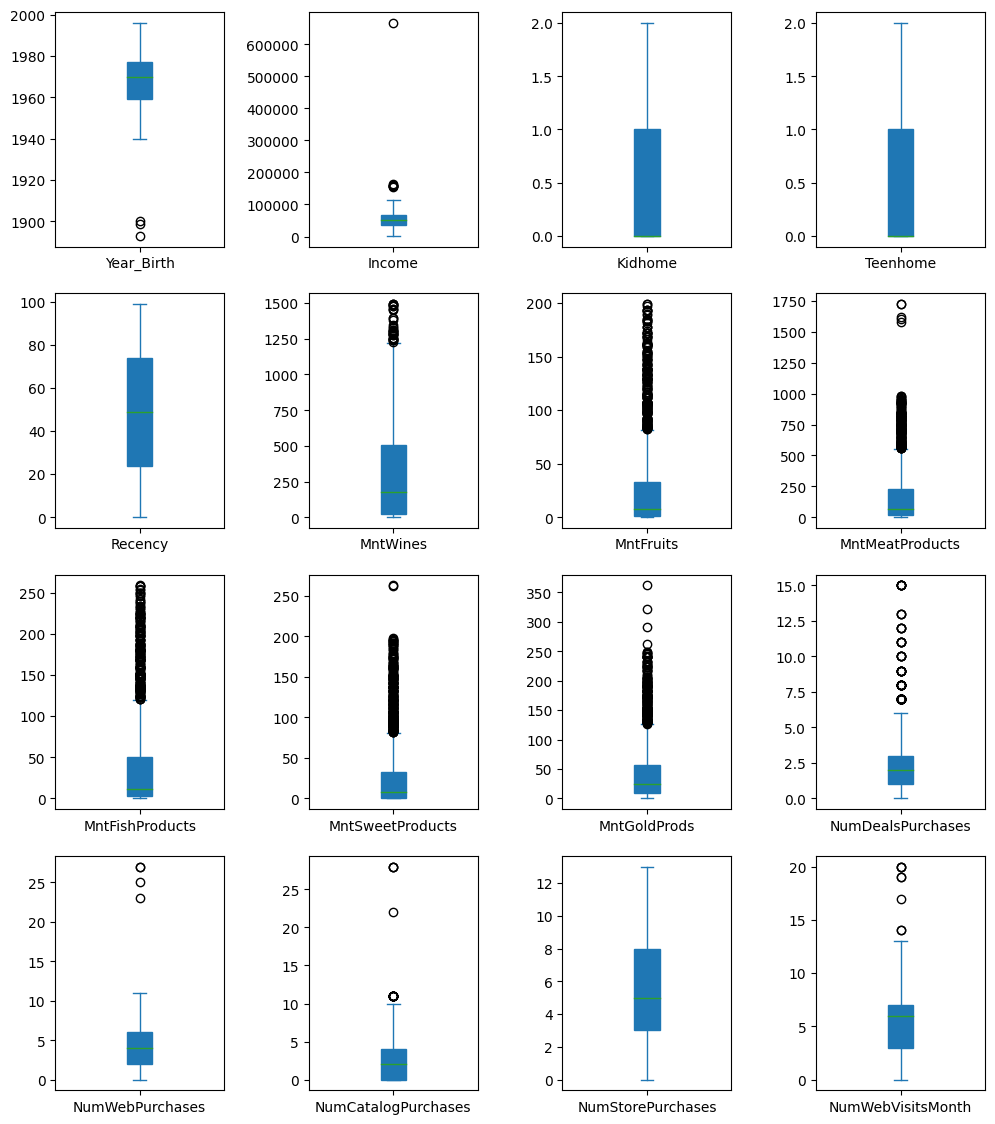

In [36]:
# select columns to plot
ma_to_plot = ma.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
ma_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

# Outliers
### Identify features containing outliers:
### Findings: Multiple features contain outliers (see boxplots above), but the only that likely indicate data entry errors are Year_Birth <= 1900

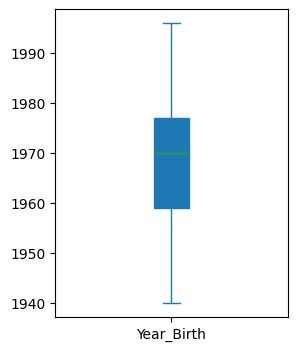

In [37]:
#Remove rows where Year_Birth <= 1900:
ma = ma[ma['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
ma['Year_Birth'].plot(kind='box', patch_artist=True);

In [56]:
ma.duplicated().sum()

0

# EDA

In [52]:
#recency=Number of days since customer's last purchase
ma['Recency'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [48]:
ma['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [58]:
ma['MntWines'].describe()

count    2237.000000
mean      303.995530
std       336.574382
min         0.000000
25%        24.000000
50%       174.000000
75%       504.000000
max      1493.000000
Name: MntWines, dtype: float64

In [59]:
ma['NumDealsPurchases'].unique()

array([ 1,  2,  3,  0,  4, 12,  7,  5,  6, 11,  9,  8, 10, 15, 13],
      dtype=int64)

In [46]:
ma.describe(include=[object])

Education Marital_Status Country
count         2237           2237    2237
unique           5              8       8
top     Graduation        Married      SP
freq          1127            864    1094

In [65]:
# How many unique values are in Columns of Data ?
for i in ma.columns:
    print(F'{i}:',len(ma[i].unique()))

ID: 2237
Year_Birth: 56
Education: 5
Marital_Status: 8
Income: 1972
Kidhome: 3
Teenhome: 3
Dt_Customer: 663
Recency: 100
MntWines: 775
MntFruits: 158
MntMeatProducts: 557
MntFishProducts: 182
MntSweetProducts: 177
MntGoldProds: 213
NumDealsPurchases: 15
NumWebPurchases: 15
NumCatalogPurchases: 14
NumStorePurchases: 14
NumWebVisitsMonth: 16
AcceptedCmp3: 2
AcceptedCmp4: 2
AcceptedCmp5: 2
AcceptedCmp1: 2
AcceptedCmp2: 2
Response: 2
Complain: 2
Country: 8
Year_Customer: 3


In [64]:
ma.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2014-06-16        0       189  ...                  1             0   
1  2014-06-15        0       464  ...                  5             0   
2  2014-05-13        0       134  ...                  2             0   
3  2014-05-11        0        10  ...                  7             0   
4  2014-04-08        0         6  ...                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

   Country  Year_Customer  
0       SP           2014  
1       CA           2014  
2       US           2014  
3      AUS           2014  
4       SP           2014  

[5 rows x 29 columns]

# Age of customers 

   ### Segmentation of Consumers

In [71]:
#to konow ages
from datetime import date
ma['Age']  = date.today().year - ma['Year_Birth']
ma.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             0             0   

   AcceptedCmp2  Response  Complain  Country  Year_Customer  Total Amount  \
0             0         1         0       SP           2014          1190   
1             1         1         0       CA           2014           577   
2             0         0         0       US           2014           251   
3             0         0         0      AUS           2014            11   
4             0         1         0       SP           2014            91   

   Total_Purchase  Age  
0              14   52  
1              17   61  
2              10   64  
3               3   55  
4               6   33  

[5 rows x 32 columns]

## how is  the distrubution of ages which ages has frequent ?

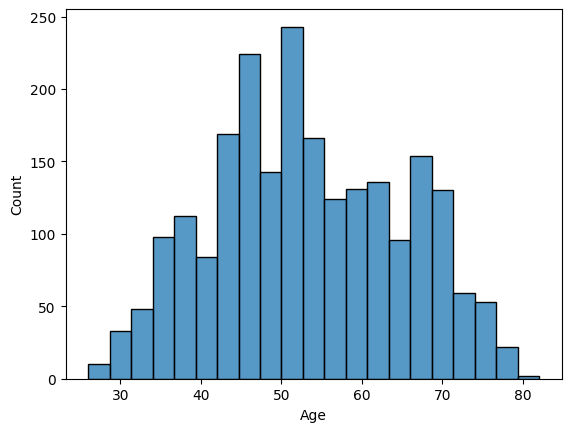

In [73]:
sns.histplot(x=ma['Age']);

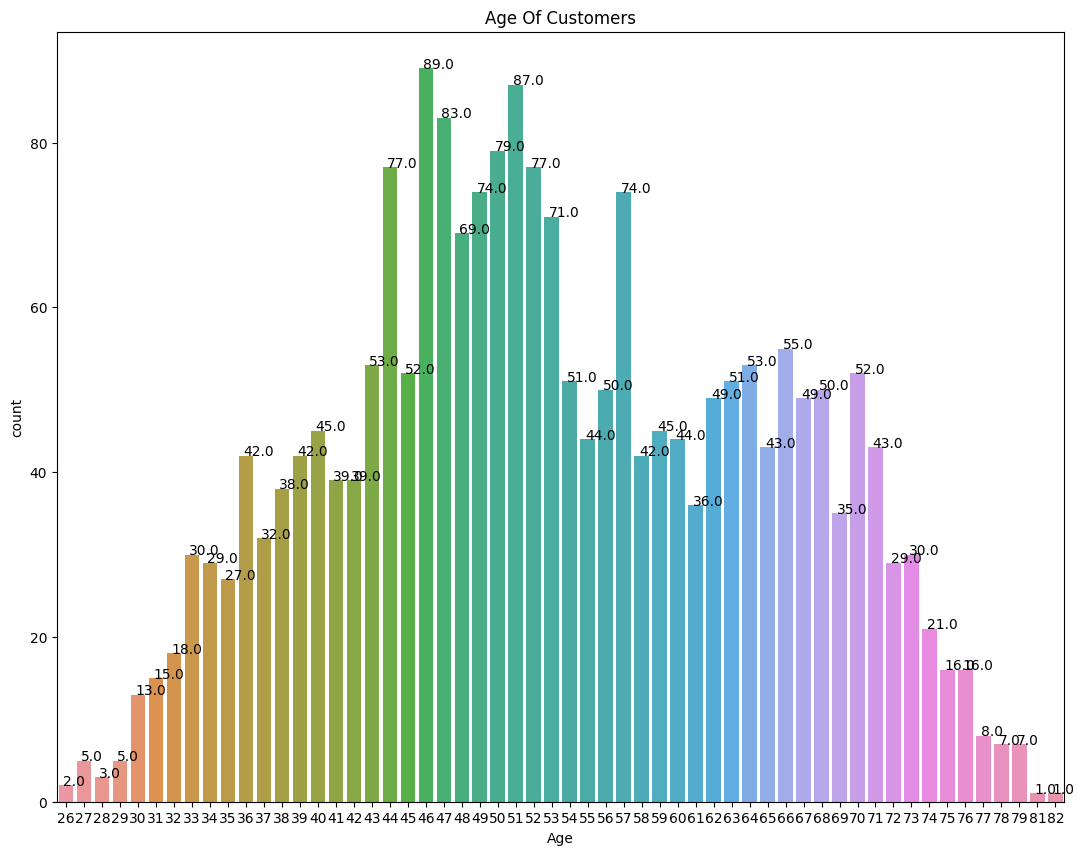

In [74]:
plt.figure(figsize=(13,10),dpi=100)
plt.title('Age Of Customers')
ax = sns.countplot(x=ma['Age']);
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [75]:
ma['Age'].describe()

count    2237.000000
mean       53.098346
std        11.701917
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: Age, dtype: float64

In [ ]:
#min of age is 26 max is 82 and mean of ages is 53

## which subset of ages has spents the most amount for our products ?

In [67]:
#combine the amounts for products 
ma['Total Amount'] = ma['MntWines']+ma['MntFruits']+ma['MntMeatProducts']+ma['MntFishProducts']+ma['MntSweetProducts']+ma['MntGoldProds']
ma.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  \
0             0             0             0         1         0       SP   
1             0             0             1         1         0       CA   
2             0             0             0         0         0       US   
3             0             0             0         0         0      AUS   
4             0             0             0         1         0       SP   

   Year_Customer  Total Amount  
0           2014          1190  
1           2014           577  
2           2014           251  
3           2014            11  
4           2014            91  

[5 rows x 30 columns]

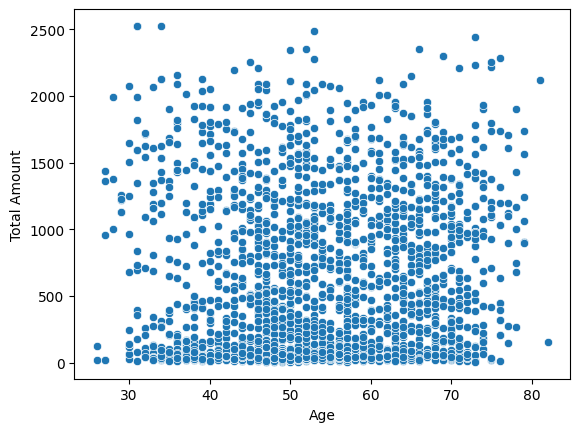

In [77]:
sns.scatterplot(x=ma['Age'],y=ma['Total Amount']);

In [ ]:
#25 and 35 probably spent more money in our products
#let's now check which products spents on ? 

In [78]:
ma.filter(regex='Mnt',axis=1)

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          189        104              379              111               189   
1          464          5               64                7                 0   
2          134         11               59               15                 2   
3           10          0                1                0                 0   
4            6         16               24               11                 0   
...        ...        ...              ...              ...               ...   
2232       372         18              126               47                48   
2233         5         10               13                3                 8   
2234       185          2               88               15                 5   
2235       267         38              701              149               165   
2236       169         24              553              188                 0   

      MntGoldProds  
0              218  
1               37  
2               30  
3                0  
4               34  
...            ...  
2232            78  
2233            16  
2234            14  
2235            63  
2236           144  

[2237 rows x 6 columns]

In [80]:
products= ma.groupby(by=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Age'], as_index=False)['Total Amount'].sum()

In [81]:
products.sort_values(by='Total Amount', ascending=False).head()

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1976      1156        120              915               94               144   
1867       901         31              345               75                31   
1967      1111         24              790              160                45   
1850       864        134              768              150                38   
1866       899        102              838              133               102   

      MntGoldProds  Age  Total Amount  
1976            96   31          5050  
1867           191   70          4722  
1967           172   69          4604  
1850           172   34          4252  
1866            40   50          4228

In [ ]:
#wine are most products that our customers spent on 
#so we want to know percent of wines by total amount 

In [83]:
ma['PercentWine'] = (ma['MntWines']/ma['Total Amount'])*100

In [84]:
ma['PercentOthers'] = ((ma['MntFruits']+ma['MntMeatProducts']+ma['MntFishProducts']+ma['MntSweetProducts']+ma['MntGoldProds'])/ma['Total Amount'])*100

In [85]:
ma.filter(regex='Percent|Total|MntWines',axis=1)

MntWines  Total Amount  Total_Purchase  PercentWine  PercentOthers
0          189          1190              14    15.882353      84.117647
1          464           577              17    80.415945      19.584055
2          134           251              10    53.386454      46.613546
3           10            11               3    90.909091       9.090909
4            6            91               6     6.593407      93.406593
...        ...           ...             ...          ...            ...
2232       372           689              18    53.991292      46.008708
2233         5            55               4     9.090909      90.909091
2234       185           309              12    59.870550      40.129450
2235       267          1383              19    19.305857      80.694143
2236       169          1078              17    15.677180      84.322820

[2237 rows x 5 columns]

In [ ]:
#obviously our customers spents on wine than others products

## which channels our customers prefer ?

In [68]:
#combine the totals purchase maded by different channels
ma['Total_Purchase']= ma['NumWebPurchases']+ma['NumCatalogPurchases']+ma['NumStorePurchases']
ma.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Year_Customer  \
0             0             0         1         0       SP           2014   
1             0             1         1         0       CA           2014   
2             0             0         0         0       US           2014   
3             0             0         0         0      AUS           2014   
4             0             0         1         0       SP           2014   

   Total Amount  Total_Purchase  
0          1190              14  
1           577              17  
2           251              10  
3            11               3  
4            91               6  

[5 rows x 31 columns]

In [86]:
ma.filter(regex='WebP|Catalog|Store|Total_Purchase',axis=1)

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  Total_Purchase
0                   4                    4                  6              14
1                   7                    3                  7              17
2                   3                    2                  5              10
3                   1                    0                  2               3
4                   3                    1                  2               6
...               ...                  ...                ...             ...
2232                5                    2                 11              18
2233                1                    0                  3               4
2234                6                    1                  5              12
2235                5                    4                 10              19
2236                8                    5                  4              17

[2237 rows x 4 columns]

In [87]:
channels= ma.groupby(by=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'], as_index=False)['Total_Purchase'].sum()

In [88]:
channels.sort_values(by='Total_Purchase', ascending=False).head()

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  Total_Purchase
26                2                    0                  3             595
11                1                    0                  3             592
80                3                    0                  3             324
27                2                    0                  4             306
29                2                    1                  3             288

In [ ]:
#most of them spent their money on stores 
#let's see the distrubtions by  percents  

In [90]:
#Percentage of store purchases

ma['PergStore'] = (ma['NumStorePurchases']/ma['Total_Purchase'])*100

#Percentage of other channel purchases

ma['PergOthers'] = ((ma['NumCatalogPurchases']+ma['NumWebPurchases'])/ma['Total_Purchase'])*100

#Display the percentages

ma.filter(regex='Store|Total_P|Perg',axis=1)

NumStorePurchases  Total_Purchase  PergStore  PergOthers
0                     6              14  42.857143   57.142857
1                     7              17  41.176471   58.823529
2                     5              10  50.000000   50.000000
3                     2               3  66.666667   33.333333
4                     2               6  33.333333   66.666667
...                 ...             ...        ...         ...
2232                 11              18  61.111111   38.888889
2233                  3               4  75.000000   25.000000
2234                  5              12  41.666667   58.333333
2235                 10              19  52.631579   47.368421
2236                  4              17  23.529412   76.470588

[2237 rows x 4 columns]

## which marketing campaign is most successful?

In [91]:
ma.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Year_Customer',
       'Total Amount', 'Total_Purchase', 'Age', 'PercentWine', 'PercentOthers',
       'PergStore', 'PergOthers'],
      dtype='object')

In [ ]:
#start in 20

In [92]:
campaigns = pd.DataFrame(ma.iloc[:,20:25].sum(), columns=['amount']).reset_index()
campaigns.head()

index  amount
0  AcceptedCmp3     163
1  AcceptedCmp4     167
2  AcceptedCmp5     162
3  AcceptedCmp1     144
4  AcceptedCmp2      30

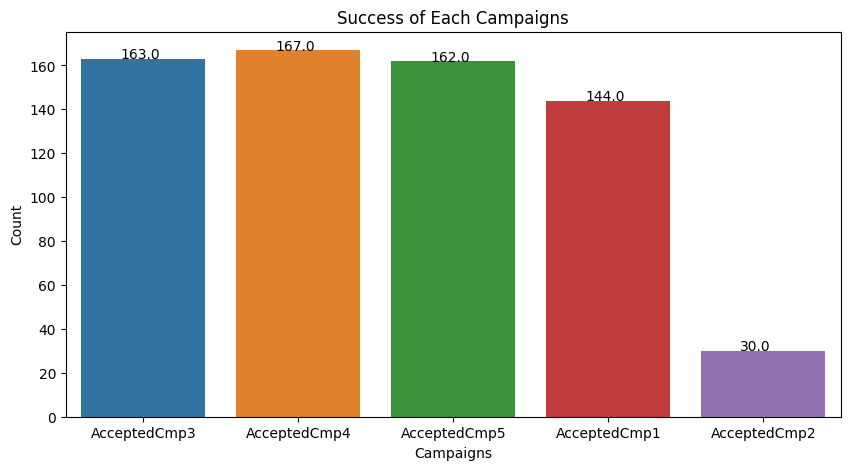

In [93]:
plt.figure(figsize=(10,5))

plt.title('Success of Each Campaigns')

yx = sns.barplot(x='index',y='amount',data=campaigns);
plt.xlabel('Campaigns')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [ ]:
#Clearly Campaign 4 was most success of all

## Revenue Generated by different products

In [94]:
revenue = pd.DataFrame(ma.iloc[:,9:15].sum(),columns=['rev_generated']).reset_index()
revenue

index  rev_generated
0          MntWines         680038
1         MntFruits          58767
2   MntMeatProducts         373393
3   MntFishProducts          83939
4  MntSweetProducts          60553
5      MntGoldProds          98358

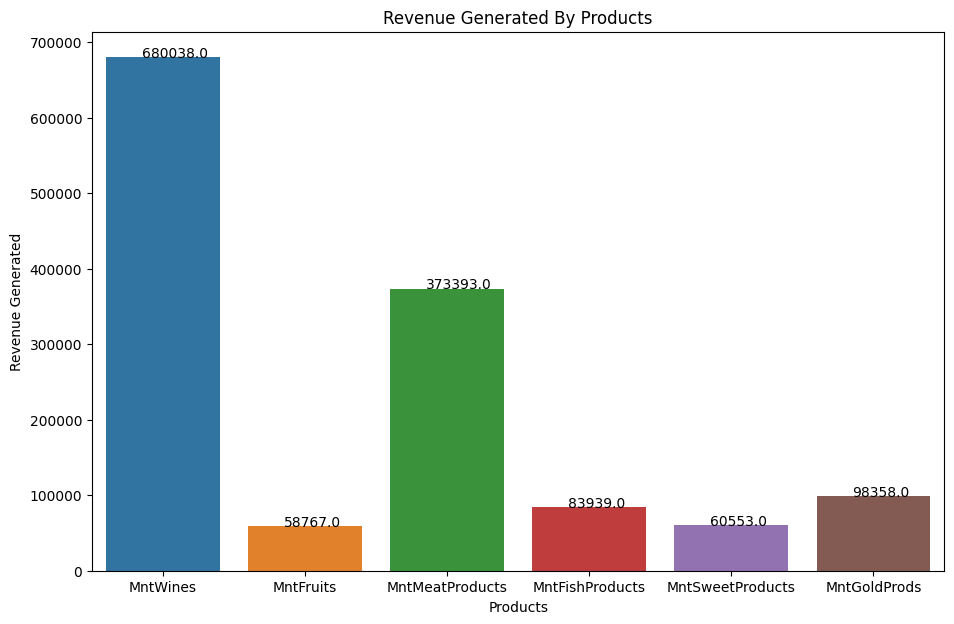

In [95]:
plt.figure(figsize=(11,7))
plt.title("Revenue Generated By Products")
yyx= sns.barplot(x='index',y='rev_generated',data=revenue);
plt.xlabel('Products')
plt.ylabel('Revenue Generated')
for p in yyx.patches: 
    yyx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

 ## there’s any pattern between the age of customers and their amount ?

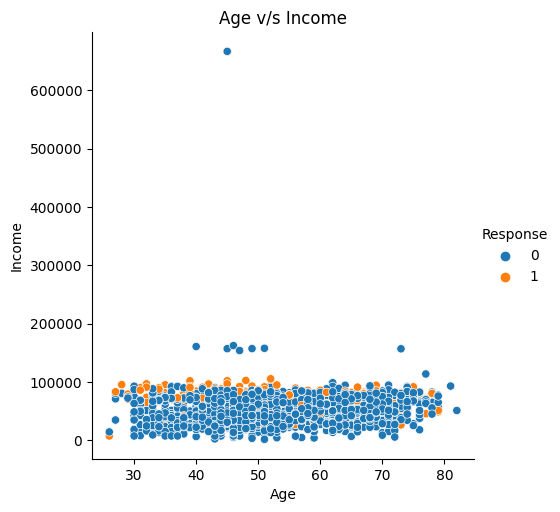

In [97]:
sns.relplot(x='Age',y='Income',hue='Response',data=ma);
plt.title('Age v/s Income');

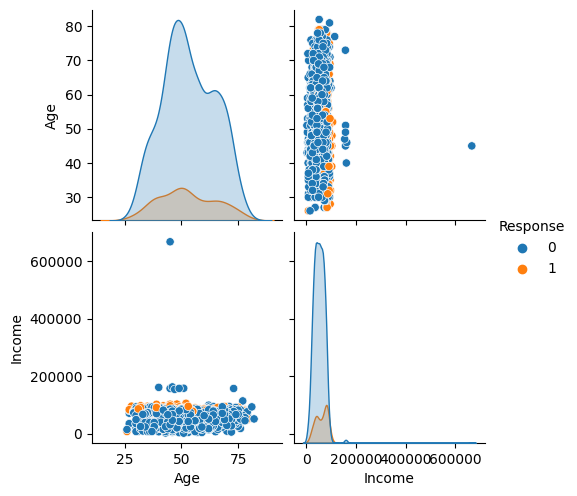

In [98]:
sns.pairplot(vars=['Age','Income'],hue='Response',data=ma);

In [ ]:
#Yes there is a slight pattern visible where customers between age 25-50,
#who have income more than 60K$ are the most recent customers

 ## which Country has the most number of customers who accepted the last campaign ?

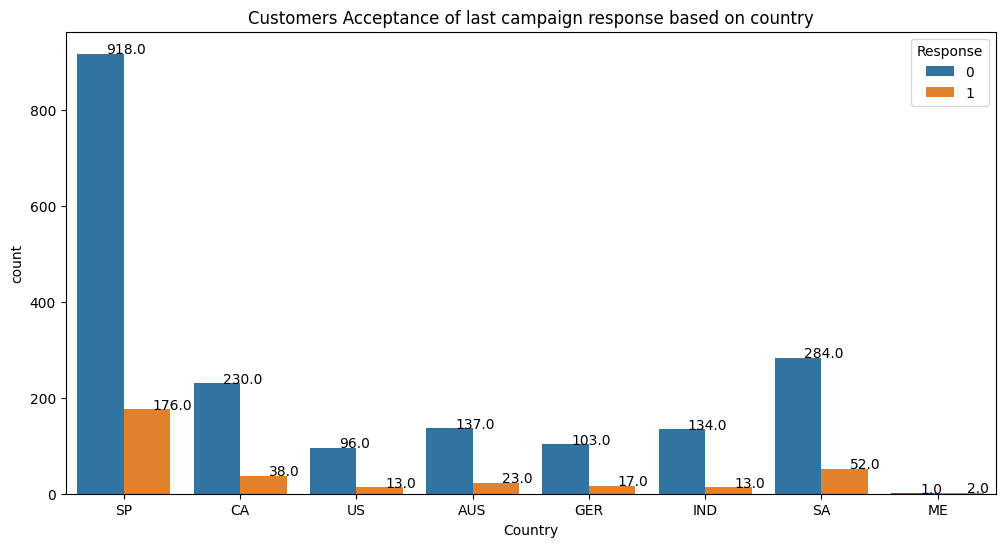

In [102]:
plt.figure(figsize=(12,6))
cs = sns.countplot(x='Country',hue='Response',data=ma)
plt.title('Customers Acceptance of last campaign response based on country');
for p in cs.patches: 
    cs.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [ ]:
#We can see that most customers who accepted the last campaign are from Spain

## Total amount/purchase v/s Dependents

In [106]:
ma['Dependents']=ma['Kidhome']+ma['Teenhome']
ma.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Country  Year_Customer  Total Amount  \
0  2014-06-16        0       189  ...       SP           2014          1190   
1  2014-06-15        0       464  ...       CA           2014           577   
2  2014-05-13        0       134  ...       US           2014           251   
3  2014-05-11        0        10  ...      AUS           2014            11   
4  2014-04-08        0         6  ...       SP           2014            91   

   Total_Purchase  Age  PercentWine  PercentOthers  PergStore  PergOthers  \
0              14   52    15.882353      84.117647  42.857143   57.142857   
1              17   61    80.415945      19.584055  41.176471   58.823529   
2              10   64    53.386454      46.613546  50.000000   50.000000   
3               3   55    90.909091       9.090909  66.666667   33.333333   
4               6   33     6.593407      93.406593  33.333333   66.666667   

   Dependents  
0           0  
1           0  
2           1  
3           2  
4           1  

[5 rows x 37 columns]

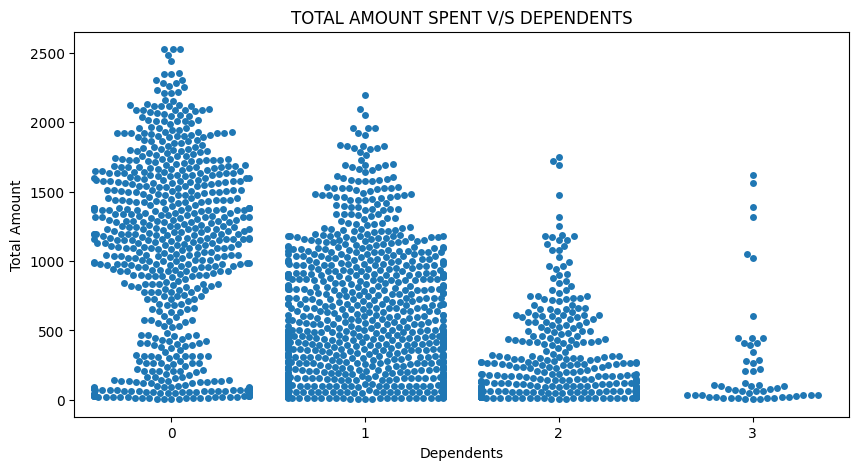

In [116]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Dependents',y='Total Amount',data=ma);
plt.title("TOTAL AMOUNT SPENT V/S DEPENDENTS");

In [ ]:
#We can see the frequency of spending more with customers 
#who have no dependents and gradually the frequency of spending and 
#total amount spent is falling down with increase of dependents.

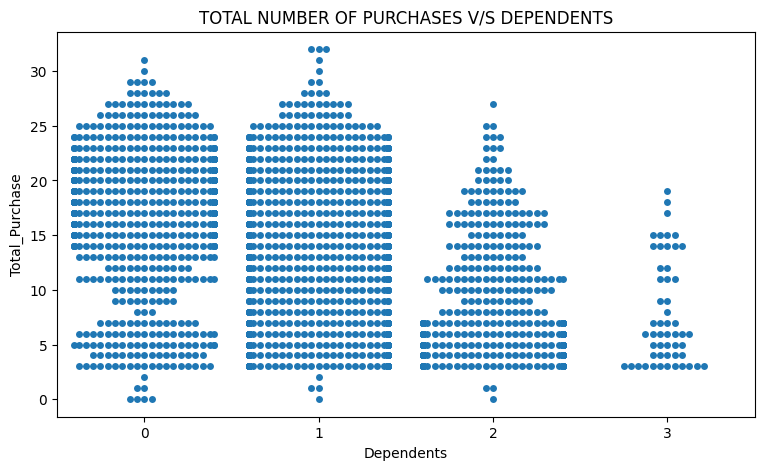

In [117]:
plt.figure(figsize=(9,5))
sns.swarmplot(x='Dependents',y='Total_Purchase',data=ma);
plt.title('TOTAL NUMBER OF PURCHASES V/S DEPENDENTS');

In [ ]:
#The Total purchases is quite constant with customers having 
#0 or 1 dependents , and with customers having 2 dependents  
#there is slight decrease but a huge downfall with those with 3 dependents

In [ ]:
Correlation analysis

In [103]:
ma.corr()

C:\Users\Pc\AppData\Local\Temp\ipykernel_2836\412929369.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ma.corr()


ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.003024  0.013737  0.002202 -0.003543   
Year_Birth           0.003024    1.000000 -0.162346  0.234133 -0.363350   
Income               0.013737   -0.162346  1.000000 -0.424887  0.019117   
Kidhome              0.002202    0.234133 -0.424887  1.000000 -0.035753   
Teenhome            -0.003543   -0.363350  0.019117 -0.035753  1.000000   
Recency             -0.046755   -0.019670 -0.003205  0.007544  0.017115   
MntWines            -0.021181   -0.163035  0.576731 -0.496367  0.005409   
MntFruits            0.007080   -0.013751  0.428191 -0.372488 -0.175951   
MntMeatProducts     -0.002622   -0.030927  0.577524 -0.437059 -0.260820   
MntFishProducts     -0.023181   -0.042519  0.437214 -0.387536 -0.203900   
MntSweetProducts    -0.006444   -0.019571  0.435918 -0.370656 -0.162218   
MntGoldProds        -0.010661   -0.057599  0.321082 -0.349633 -0.020186   
NumDealsPurchases   -0.036917   -0.067999 -0.082089  0.221799  0.387792   
NumWebPurchases     -0.017913   -0.153973  0.380847 -0.362063  0.155776   
NumCatalogPurchases -0.001893   -0.125439  0.586750 -0.502438 -0.110285   
NumStorePurchases   -0.014062   -0.139465  0.527346 -0.500387  0.050517   
NumWebVisitsMonth   -0.008104    0.117570 -0.549429  0.447641  0.134491   
AcceptedCmp3        -0.035959    0.061013 -0.015954  0.014606 -0.042823   
AcceptedCmp4        -0.025292   -0.064341  0.182932 -0.161775  0.038790   
AcceptedCmp5        -0.005062    0.015322  0.333977 -0.204994 -0.190227   
AcceptedCmp1        -0.021524   -0.008227  0.275140 -0.172512 -0.140288   
AcceptedCmp2        -0.015027   -0.007657  0.087671 -0.081794 -0.015664   
Response            -0.021810    0.018424  0.133121 -0.080176 -0.154730   
Complain             0.031520   -0.004479 -0.024866  0.036283  0.007591   
Year_Customer       -0.007496   -0.025001  0.022211  0.053919 -0.008878   
Total Amount        -0.015830   -0.113865  0.664707 -0.556902 -0.137769   
Total_Purchase      -0.014021   -0.173200  0.622857 -0.569244  0.038134   
Age                 -0.003024   -1.000000  0.162346 -0.234133  0.363350   
PercentWine         -0.010898   -0.295083  0.242313 -0.160903  0.453230   
PercentOthers        0.010898    0.295083 -0.242313  0.160903 -0.453230   
PergStore            0.012554    0.104616 -0.325838  0.269919  0.009253   
PergOthers          -0.012554   -0.104616  0.325838 -0.269919 -0.009253   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.046755 -0.021181   0.007080        -0.002622   
Year_Birth          -0.019670 -0.163035  -0.013751        -0.030927   
Income              -0.003205  0.576731   0.428191         0.577524   
Kidhome              0.007544 -0.496367  -0.372488        -0.437059   
Teenhome             0.017115  0.005409  -0.175951        -0.260820   
Recency              1.000000  0.016668  -0.003592         0.023705   
MntWines             0.016668  1.000000   0.388518         0.561993   
MntFruits           -0.003592  0.388518   1.000000         0.542057   
MntMeatProducts      0.023705  0.561993   0.542057         1.000000   
MntFishProducts      0.001532  0.399073   0.594438         0.567880   
MntSweetProducts     0.023045  0.385992   0.567054         0.523418   
MntGoldProds         0.017412  0.386376   0.390042         0.348845   
NumDealsPurchases   -0.000987  0.010829  -0.131886        -0.122465   
NumWebPurchases     -0.010616  0.542177   0.297024         0.293579   
NumCatalogPurchases  0.025449  0.634784   0.487307         0.723519   
NumStorePurchases    0.001117  0.642433   0.463168         0.480110   
NumWebVisitsMonth   -0.021959 -0.320337  -0.417427        -0.539203   
AcceptedCmp3        -0.032976  0.062201   0.014983         0.018331   
AcceptedCmp4         0.018890  0.373532   0.010402         0.103053   
AcceptedCmp5         0.000956  0.471969   0.212027         0.372212   
AcceptedCmp1        -0.019258  0.354365   0.195380         0

In [107]:
datacor = ma[['Age','Education','Marital_Status','Dependents','Income','Total Amount','Total_Purchase','PercentWine','Recency','NumWebVisitsMonth','Response','Complain']]
datacor

Age   Education Marital_Status  Dependents   Income  Total Amount  \
0      52  Graduation       Divorced           0  84835.0          1190   
1      61  Graduation         Single           0  57091.0           577   
2      64  Graduation        Married           1  67267.0           251   
3      55  Graduation       Together           2  32474.0            11   
4      33  Graduation         Single           1  21474.0            91   
...   ...         ...            ...         ...      ...           ...   
2232   46         PhD       Divorced           1  66476.0           689   
2233   45    2n Cycle        Married           1  31056.0            55   
2234   46  Graduation       Divorced           1  46310.0           309   
2235   44  Graduation        Married           0  65819.0          1383   
2236   53         PhD        Married           2  94871.0          1078   

      Total_Purchase  PercentWine  Recency  NumWebVisitsMonth  Response  \
0                 14    15.882353        0                  1         1   
1                 17    80.415945        0                  5         1   
2                 10    53.386454        0                  2         0   
3                  3    90.909091        0                  7         0   
4                  6     6.593407        0                  7         1   
...              ...          ...      ...                ...       ...   
2232              18    53.991292       99                  4         0   
2233               4     9.090909       99                  8         0   
2234              12    59.870550       99                  8         0   
2235              19    19.305857       99                  3         0   
2236              17    15.677180       99                  7         1   

      Complain  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2232         0  
2233         0  
2234         0  
2235         0  
2236         0  

[2237 rows x 12 columns]

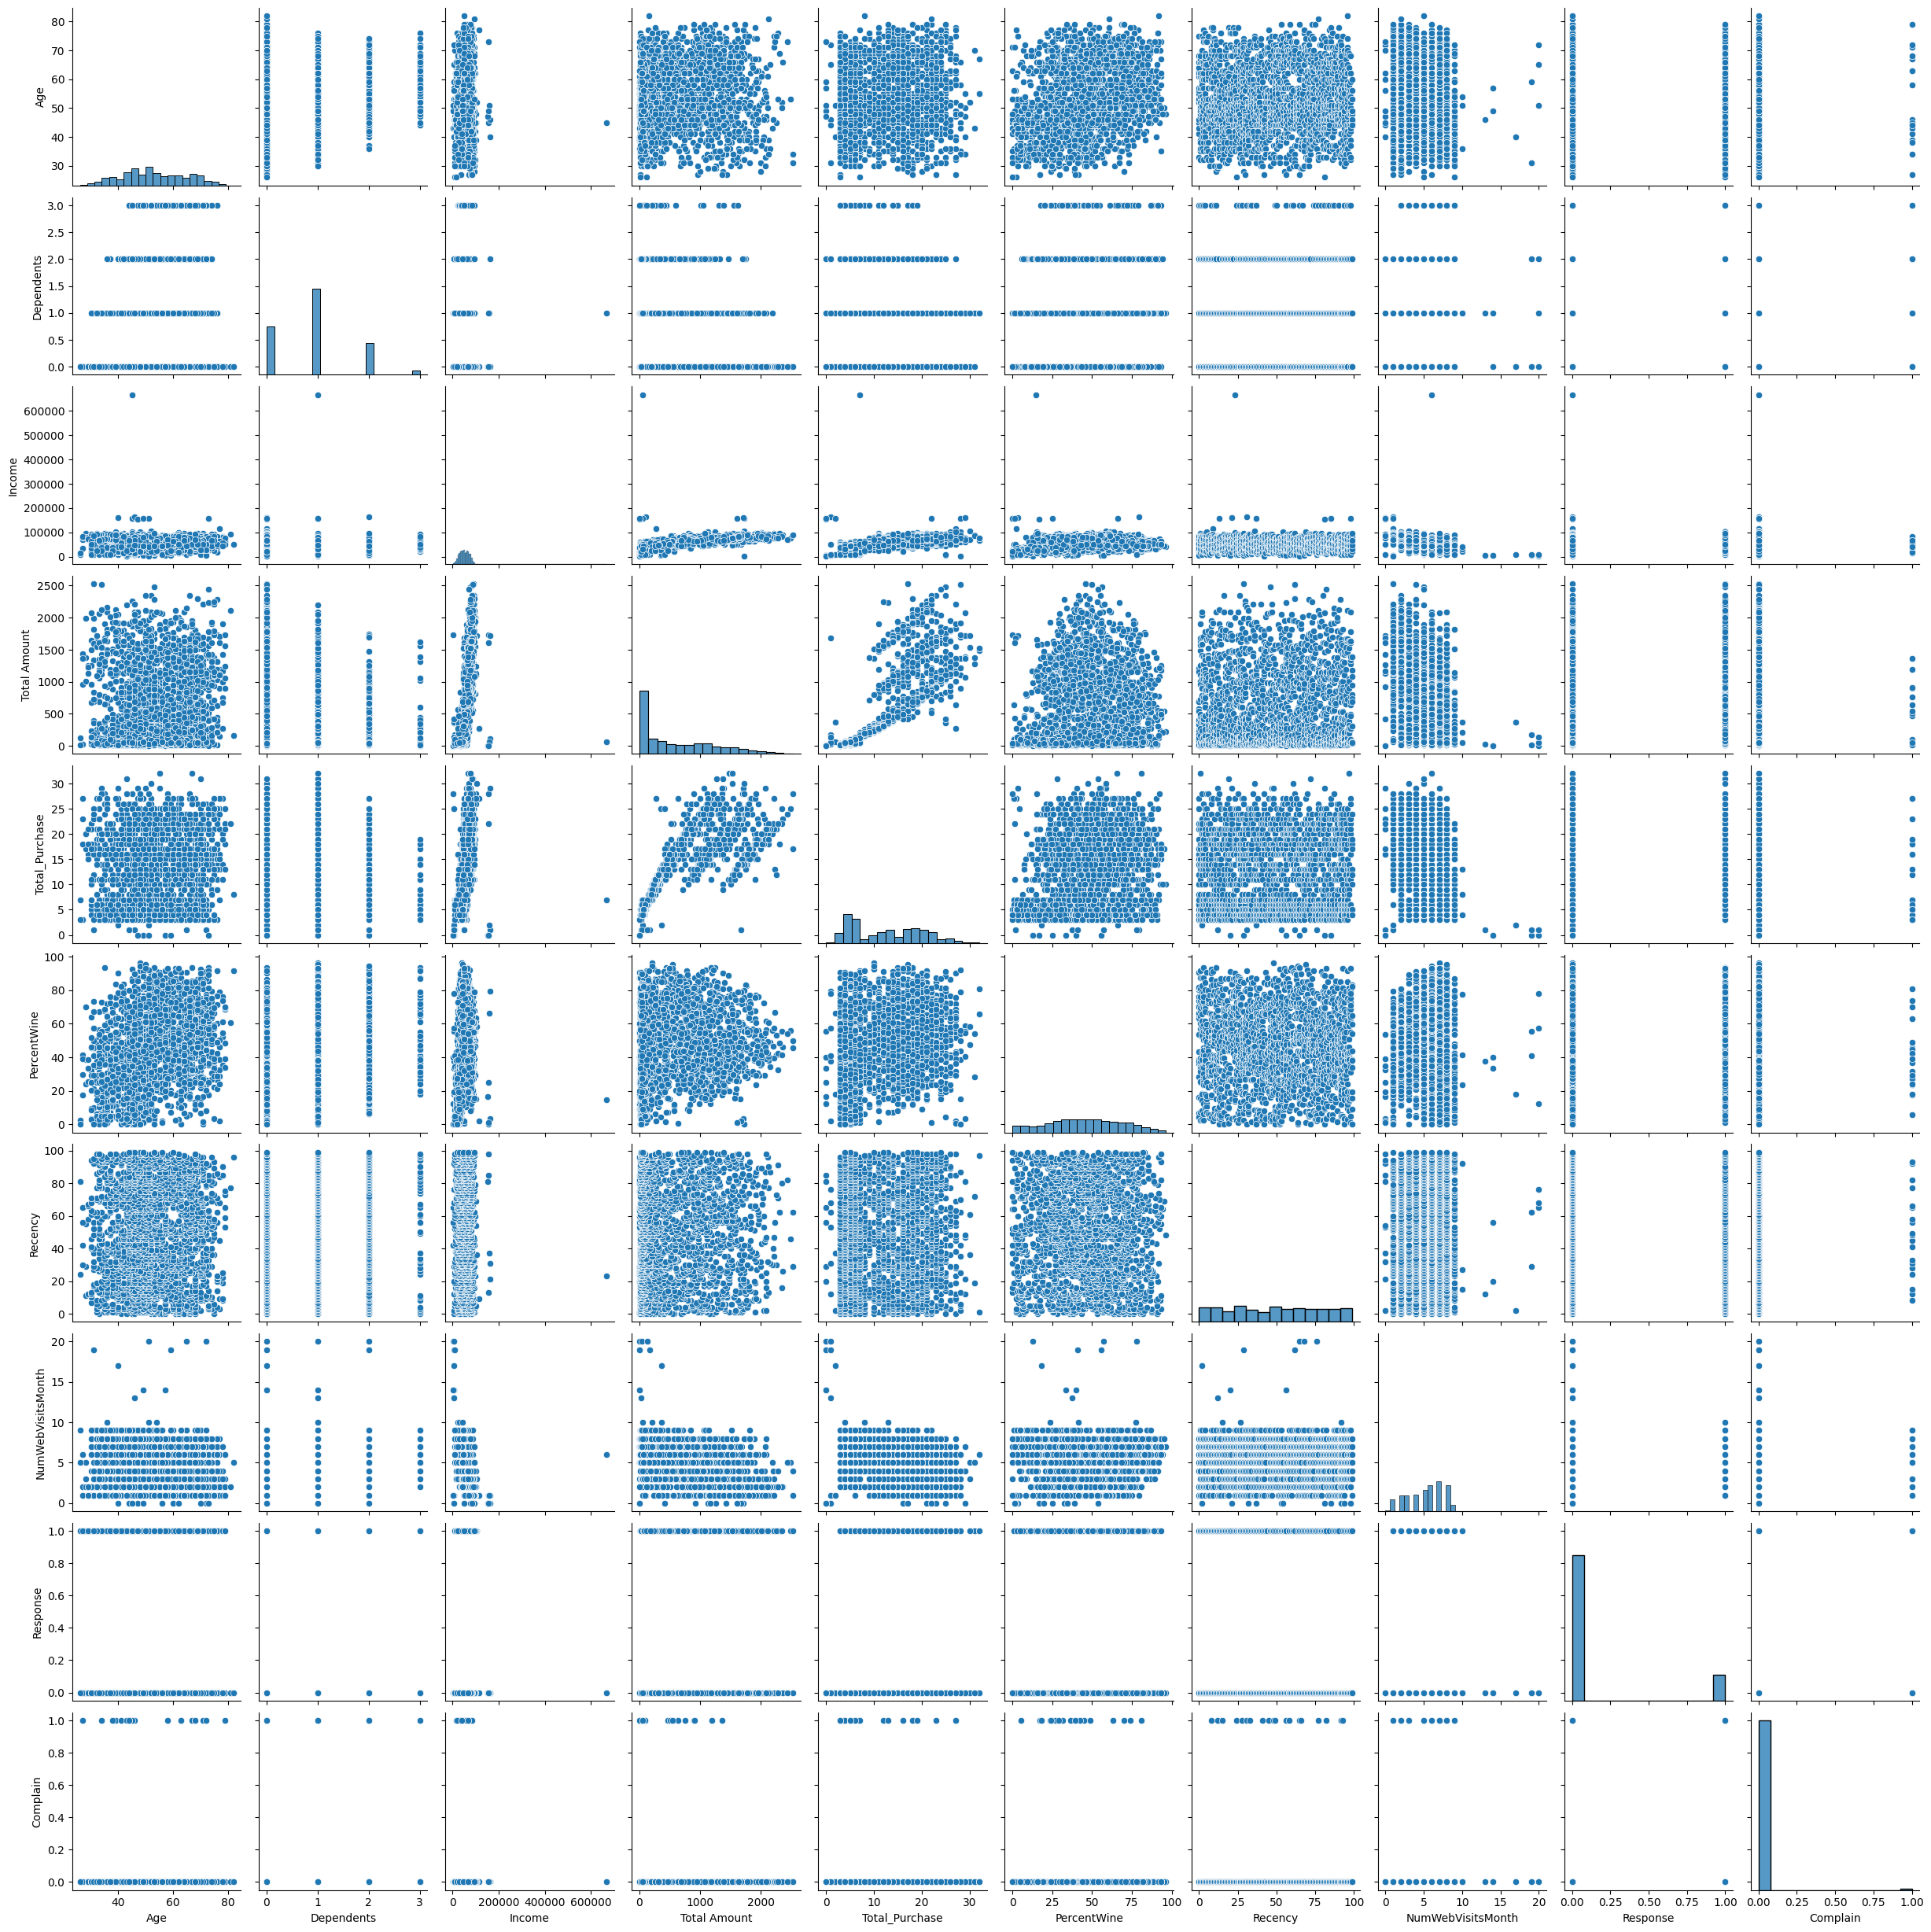

In [108]:
sns.pairplot(datacor);

C:\Users\Pc\AppData\Local\Temp\ipykernel_2836\500711895.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ma.corr(), annot=True,fmt=".0%")


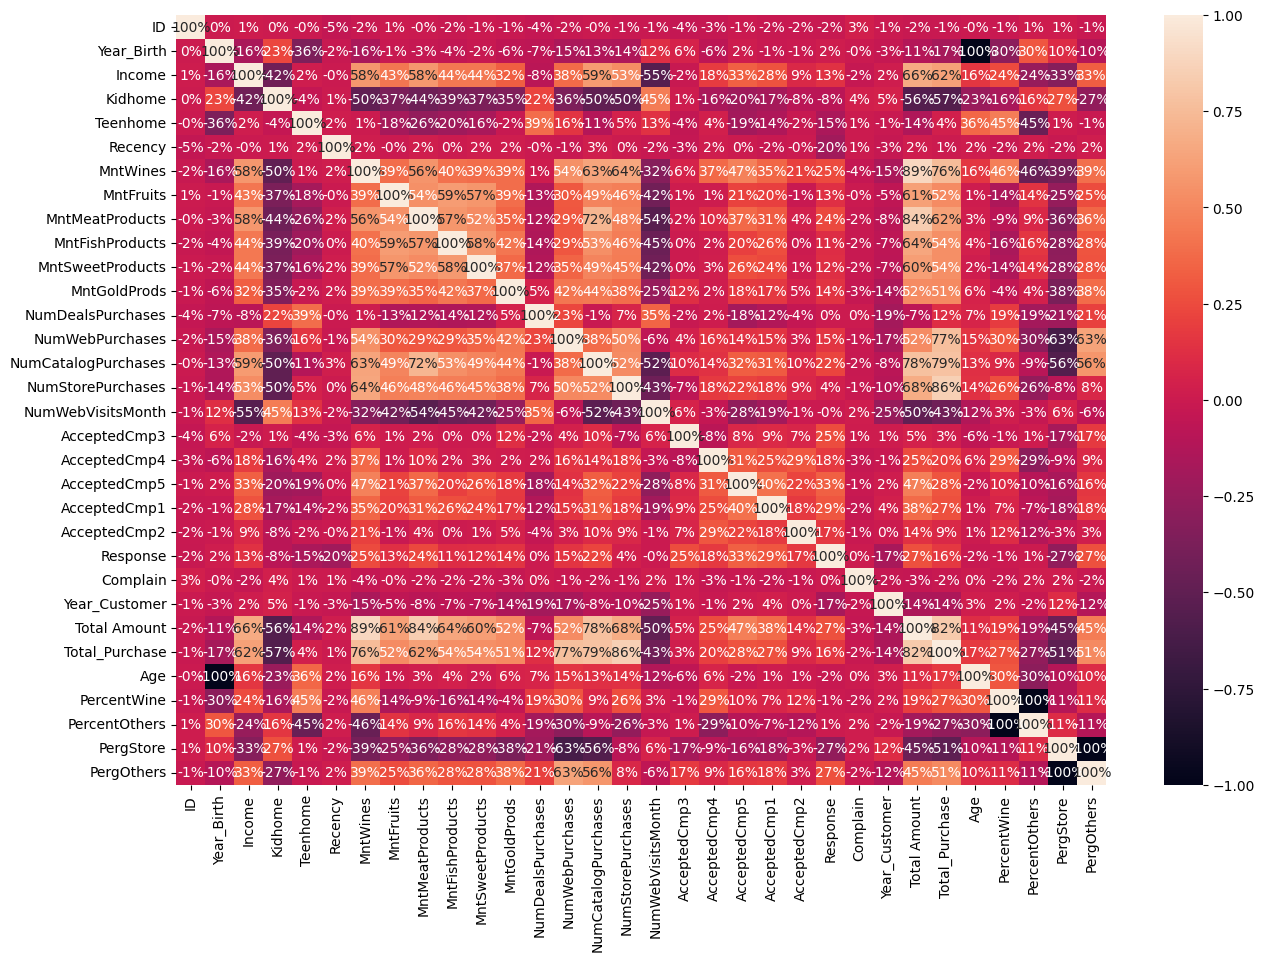

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(ma.corr(), annot=True,fmt=".0%")
plt.show()

## State the Education background of the customers who have registered the most number of complaints.

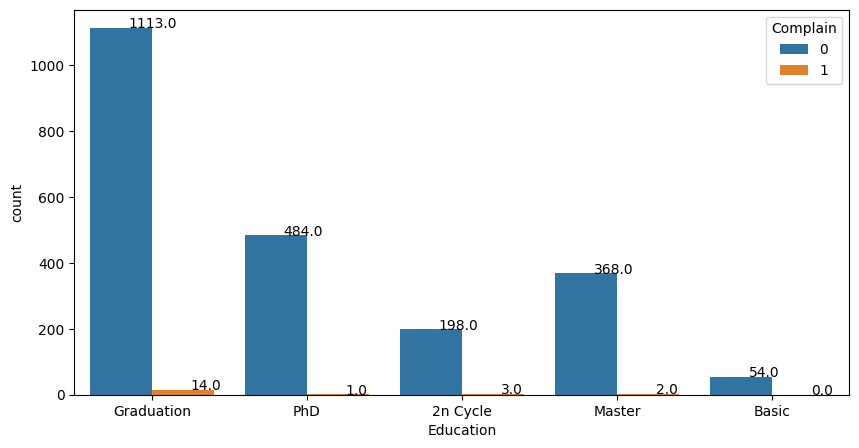

In [110]:
plt.figure(figsize=(10,5))
ec = sns.countplot(x='Education',hue='Complain',data=ma)
for p in ec.patches: 
    ec.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [ ]:
#The most number of complaints were registerd by customers with education
#of Graduation.

## Plot a pairplot with hue as Response.
## Plot a pairplot with hue as Education.
## Plot a pairplot with hue as Marital Status and write your key observations.

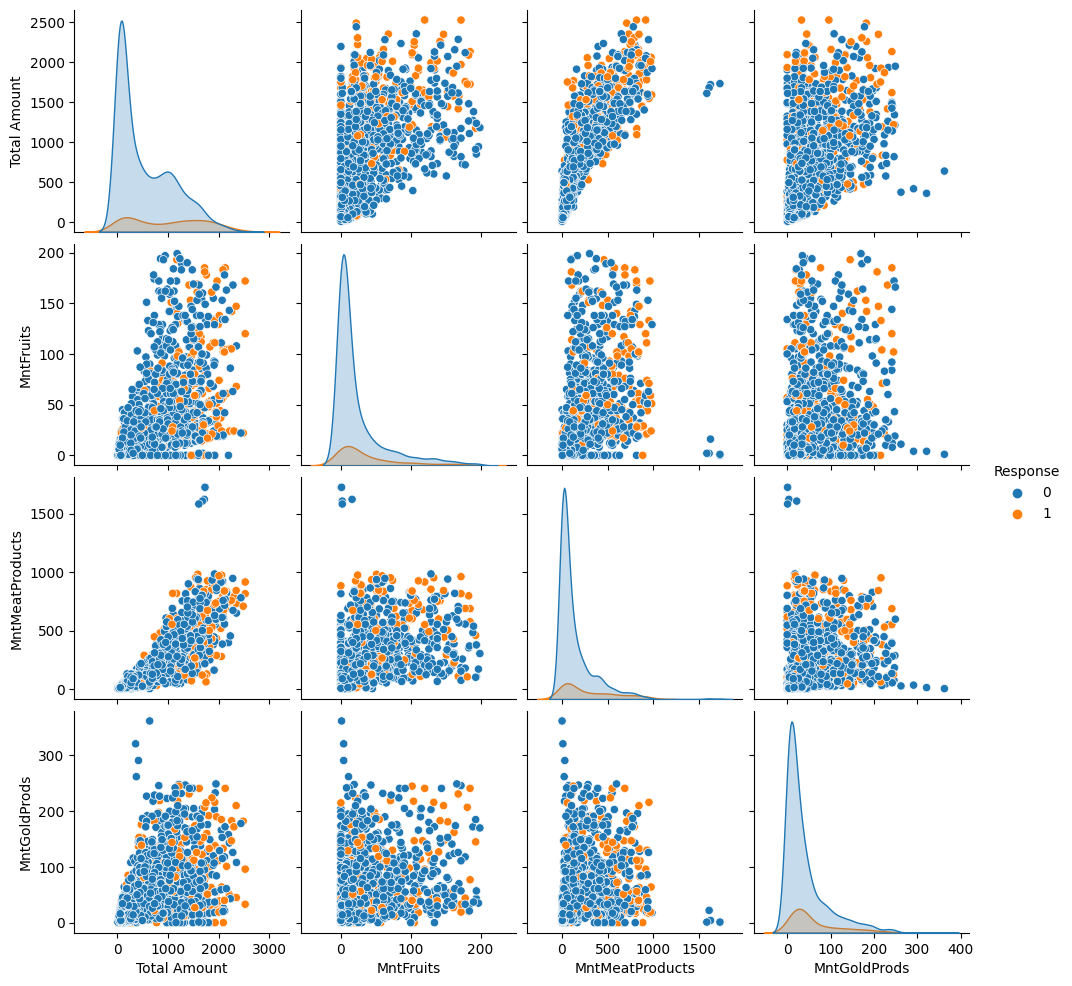

In [111]:
sns.pairplot(vars=['Total Amount','MntFruits','MntMeatProducts','MntGoldProds'], hue='Response',data=ma);

In [ ]:
#Obervations:

#Customers having Total Amount more than 1500$, are major buyers of fruits,meat and gold products in the latest campaign
#Customers having spent more than 500$ on meat products are major buyers of fruits and gold products in the latest campaign

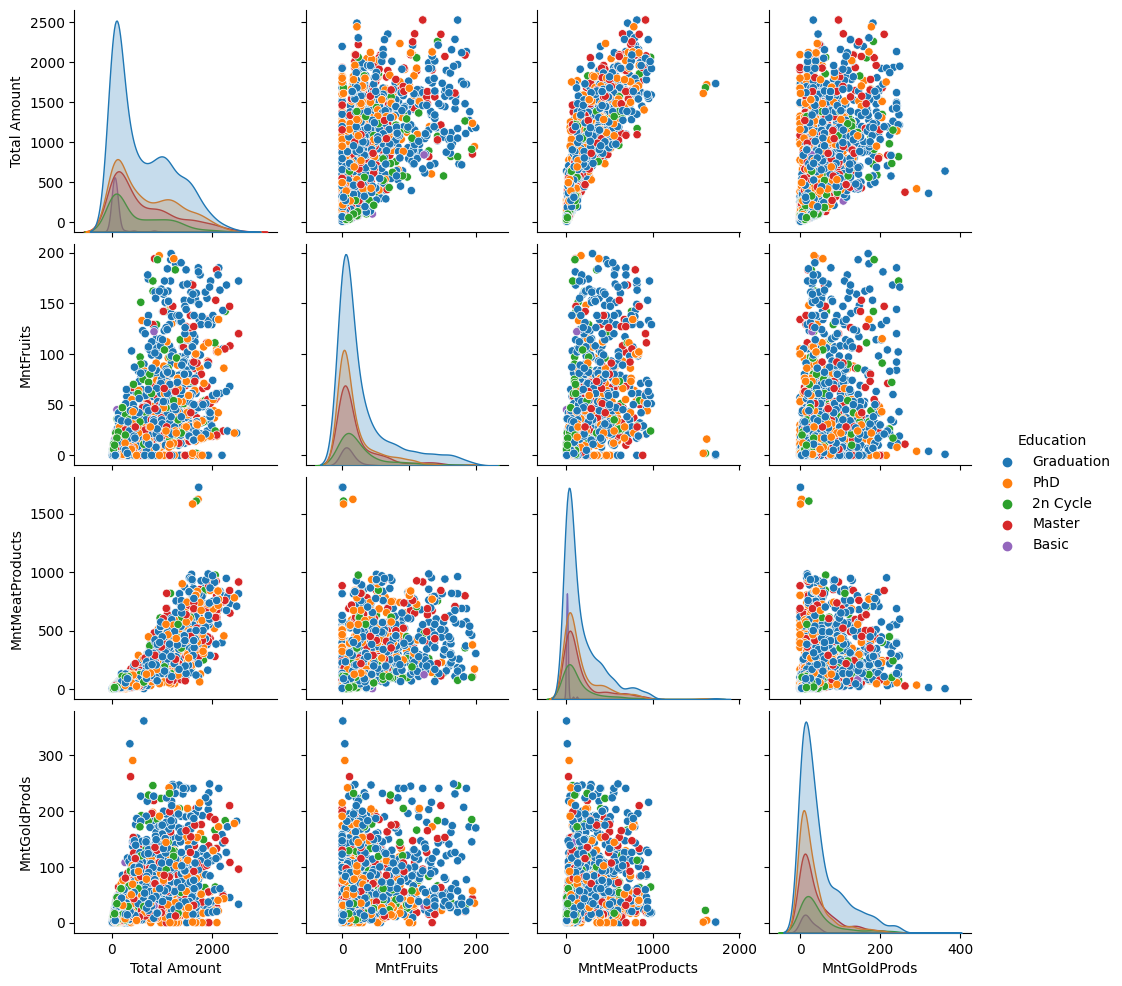

In [112]:
sns.pairplot(vars=['Total Amount','MntFruits','MntMeatProducts','MntGoldProds'], hue='Education',data=ma);

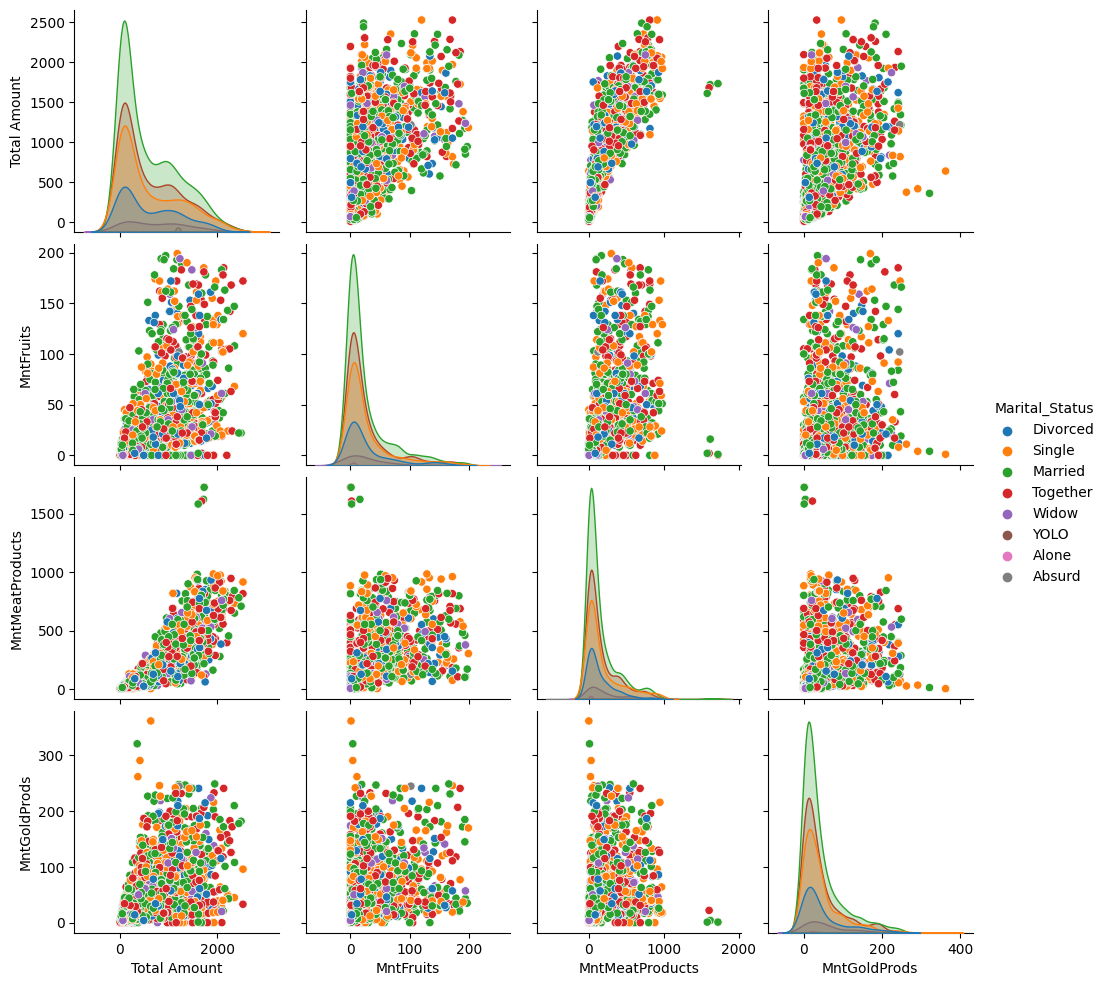

In [113]:
sns.pairplot(vars=['Total Amount','MntFruits','MntMeatProducts','MntGoldProds'], hue='Marital_Status',data=ma);